In [13]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [21]:
plt.rcParams["figure.figsize"] = (12,8)
plt.style.use('Solarize_Light2')

# Prediction Credit Scoring

In [7]:
df_old = pd.read_csv('../Datasets/DATA_3.01_CREDIT.csv')
df = pd.read_csv('../Datasets/DATA_4.01_CREDIT2.csv')

In [8]:
df.head()

,Income,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,21.786,355,1,50,17,Male,No,Yes,Caucasian,580
1,31.335,289,3,38,7,Female,No,No,Caucasian,172
2,59.855,365,1,46,13,Female,No,Yes,Caucasian,295
3,44.061,352,1,79,11,Male,No,Yes,African American,414
4,82.706,536,2,64,13,Female,No,Yes,Asian,905


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     100 non-null    float64
 1   Rating     100 non-null    int64  
 2   Cards      100 non-null    int64  
 3   Age        100 non-null    int64  
 4   Education  100 non-null    int64  
 5   Gender     100 non-null    object 
 6   Student    100 non-null    object 
 7   Married    100 non-null    object 
 8   Ethnicity  100 non-null    object 
 9   Balance    100 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 7.9+ KB


In [10]:
df.describe()

,Income,Rating,Cards,Age,Education,Balance
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,48.712360,375.410000,2.750000,57.720000,13.620000,572.000000
std,39.071113,164.841834,1.416889,17.271498,3.280737,435.465199
min,10.735000,112.000000,1.000000,23.000000,6.000000,0.000000
25%,21.001750,282.000000,2.000000,44.000000,11.000000,191.000000
50%,33.275000,363.000000,3.000000,57.500000,14.000000,579.000000
75%,61.797000,448.000000,3.000000,71.000000,16.000000,890.000000
max,182.728000,982.000000,9.000000,98.000000,19.000000,1999.000000


In [11]:
# summary statistics for object dtypes:
df.describe(include=['object'])

,Gender,Student,Married,Ethnicity
count,100,100,100,100
unique,2,2,2,3
top,Male,No,Yes,Caucasian
freq,61,92,62,58


In [14]:
# Estimate a linear regression model of Rating from the old dataset 
# as a function of everything else
all_columns = "+".join(df_old.columns).replace('Rating+', '')
my_formula = 'Rating~' + all_columns
linreg = smf.ols(my_formula, data=df_old).fit()

In [16]:
predcreditscore = linreg.predict(df)

In [17]:
# Compute the correlation between the fitted values and the actual ones
np.corrcoef(df_old['Rating'], linreg.fittedvalues)[1,0]

0.9867324157146664

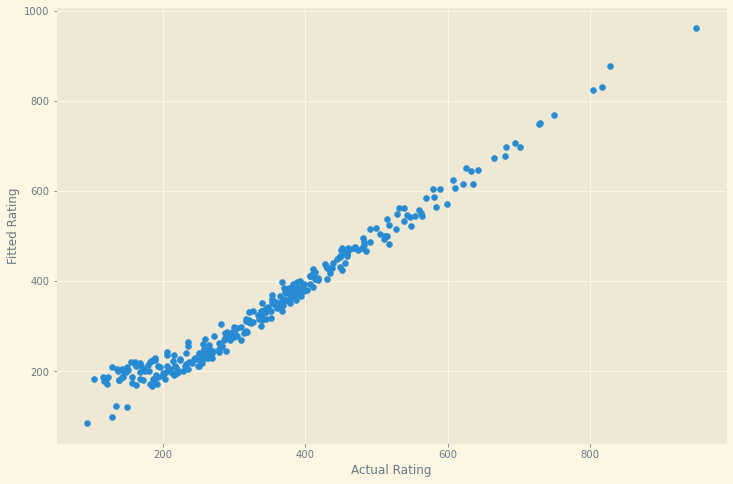

In [22]:
# plot the fitted values vs the actual values:
plt.scatter(df_old['Rating'], linreg.fittedvalues)
plt.xlabel('Rating Old Data')
plt.ylabel('Fitted Rating');

In [23]:
# Computes the correlation coefficient between the fitted values and the actual ones
np.corrcoef(predcreditscore, df['Rating'])[1,0]

0.9880970401112148

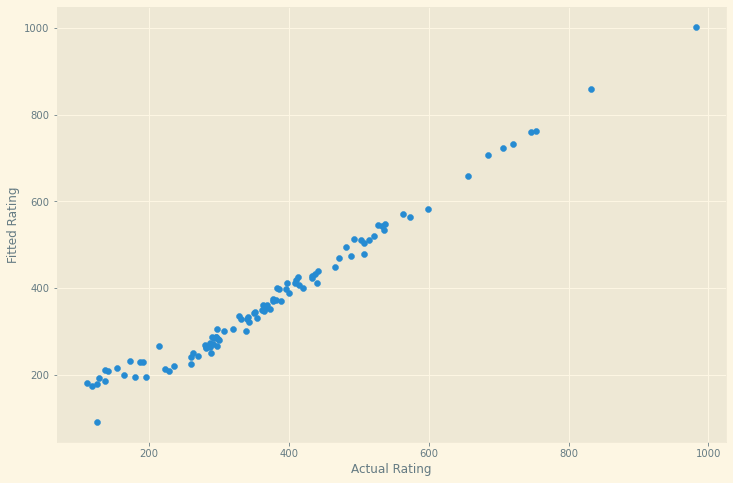

In [24]:
# Plot the fitted values vs. the actual ones
plt.scatter(df['Rating'], predcreditscore)
plt.xlabel('Actual Rating')
plt.ylabel('Fitted Rating');

In [26]:
predcreditscore.by

count     100.000000
mean      377.051464
std       162.221077
min        91.832483
25%       264.904719
50%       347.840375
75%       442.047402
max      1002.233103
dtype: float64

In [28]:
# The minimum predicted score goes to:
df_new.iloc[predcreditscore.idxmin()]

Income                 16.279
Rating                    126
Cards                       3
Age                        78
Education                  13
Gender                   Male
Student                   Yes
Married                   Yes
Ethnicity    African American
Balance                     5
Name: 20, dtype: object

In [29]:
# The maximum predict score:
df_new.iloc[predcreditscore.idxmax()]

Income         182.728
Rating             982
Cards                4
Age                 98
Education           17
Gender            Male
Student             No
Married            Yes
Ethnicity    Caucasian
Balance           1999
Name: 23, dtype: object